In [ ]:
!pip install yfinance numpy pandas matplotlib tensorflow scikit-learn

In [ ]:
# === 1. Mengambil Data Saham ===
import yfinance as yf

# Download data saham BMRI dari Yahoo Finance
ticker = 'BMRI.JK'  # Kode saham BMRI di Yahoo Finance
start_date = '2015-02-14'
end_date = '2025-02-14'

# Ambil data saham dan filter kolom yang diperlukan
data = yf.download(ticker, start=start_date, end=end_date)
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[required_columns]

# Simpan ke file CSV dengan nama khusus
csv_filename = 'SAHAM-BMRI.JK.csv'
data.to_csv(csv_filename, index=True)

print(f"Data saham {ticker} telah disimpan ke dalam file '{csv_filename}'")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Data saham BMRI.JK telah disimpan ke dalam file 'SAHAM-BMRI.JK.csv'


In [ ]:
# # === 1. Ambil Data Saham ===
# import yfinance as yf

# # Download stock data using yfinance
# ticker = 'BMRI.jk' # Ex, BMRI Inc.
# data = yf.download(ticker, start='2015-02-14', end='2025-02-14')
# required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
# # required_columns = ['Close']
# data = data[required_columns]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
# import os
# import pandas as pd
# import yfinance as yf

# ticker = 'BMRI.JK'
# filename = f'{ticker}.csv'

# # Cek apakah file CSV sudah ada, jika ada maka gunakan file lokal
# if os.path.exists(filename):
#     print("🔁 Menggunakan data saham dari file lokal...")
#     df = pd.read_csv(filename, skiprows=2, header=0)
#     df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
# else:
#     print("⬇️ Mengunduh data saham dari Yahoo Finance...")
#     data = yf.download(ticker, start='2015-02-14', end='2025-02-14', progress=False)
#     data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
#     data.to_csv(filename)
#     df = pd.read_csv(filename, skiprows=2, header=0)
#     df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

⬇️ Mengunduh data saham dari Yahoo Finance...


In [ ]:
data.to_csv('SAHAM-BMRI.JK.csv')

In [ ]:
data.head(7)

Price,Open,High,Low,Close,Volume
Ticker,BMRI.JK,BMRI.JK,BMRI.JK,BMRI.JK,BMRI.JK
Date,,,,,
2015-02-16,1804.317169,1811.898334,1781.573676,1785.364258,85716800
2015-02-17,1785.364178,1796.735924,1766.411267,1773.992432,28532800
2015-02-18,1819.479044,1864.966020,1800.526137,1808.107300,167238000
2015-02-20,1815.688746,1849.803984,1815.688746,1830.851074,74989600
2015-02-23,1804.316949,1827.060440,1792.945204,1800.526367,118434000
2015-02-24,1789.154622,1811.898113,1785.364040,1800.526367,81622800
2015-02-25,1804.316772,1808.107354,1796.735610,1804.316772,62958800


In [ ]:
# Setting Random Seed
import random
import numpy as np
import tensorflow as tf

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv('SAHAM-BMRI.JK.csv', skiprows=2, header=0)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# Pastikan baris pertama memang berisi data
df = df[1:]

# Konversi kolom Date ke format datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

# Jadikan Date sebagai index
df.set_index('Date', inplace=True)

In [ ]:
df.head(3000)

,Open,High,Low,Close,Volume
Date,,,,,
2015-02-17,1785.364178,1796.735924,1766.411267,1773.992432,28532800
2015-02-18,1819.479044,1864.966020,1800.526137,1808.107300,167238000
2015-02-20,1815.688746,1849.803984,1815.688746,1830.851074,74989600
2015-02-23,1804.316949,1827.060440,1792.945204,1800.526367,118434000
2015-02-24,1789.154622,1811.898113,1785.364040,1800.526367,81622800
...,...,...,...,...,...
2025-02-07,4542.956424,4679.245117,4497.526860,4679.245117,407896100
2025-02-10,4679.245239,4679.245239,4533.870630,4542.956543,169384300
2025-02-11,4315.808431,4497.526680,4315.808431,4433.925293,316743200


In [ ]:
df.info(7)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2471 entries, 2015-02-17 to 2025-02-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2471 non-null   float64
 1   High    2471 non-null   float64
 2   Low     2471 non-null   float64
 3   Close   2471 non-null   float64
 4   Volume  2471 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 115.8 KB


In [ ]:
df.size

12355

In [ ]:
# === 2. Normalisasi Data ===
# Memilih semua kolom untuk dinormalisasi
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

def create_dataset(data, time_steps=60):
    x, y = [], []
    for i in range(time_steps, len(data)):
        x.append(data[i-time_steps:i])  # Ambil time_steps data sebelumnya
        y.append(data[i, 3])  # Kolom indeks ke-3 adalah 'Close'
    return np.array(x), np.array(y)

In [ ]:
# Split Data
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Buat dataset untuk training dan testing
x_train, y_train = create_dataset(train_data)
x_test, y_test = create_dataset(test_data)

# Reshape untuk model deep learning (samples, time_steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

In [ ]:
# # Build LSTM Model
# model = Sequential([
#     LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
#     Dropout(0.2),
#     LSTM(50, return_sequences=False),
#     Dropout(0.2),
#     Dense(25),
#     Dense(1)
# ])

In [ ]:
# Pembuatan Arsitektur Model LSTM
model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    Dropout(0.1),
    LSTM(64, return_sequences=True),
    Dropout(0.1),
    LSTM(64, return_sequences=False),
    Dropout(0.1),
    Dense(50, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile Model
optimizer = Adam(learning_rate=0.0001)
model_lstm.compile(optimizer=optimizer)

# Train Model
history = model_lstm.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step - loss: 0.0290 - val_loss: 0.0471
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 0.0017 - val_loss: 0.0079
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 9.1949e-04 - val_loss: 0.0029
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - loss: 8.1162e-04 - val_loss: 0.0031
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - loss: 7.9417e-04 - val_loss: 0.0026
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 7.3197e-04 - val_loss: 0.0023
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 7.7589e-04 - val_loss: 0.0034
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - loss: 7.5449e-04 - val_loss: 0.0046
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 7.1488e-04 - val_loss: 0.0037
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - loss: 6.4877e-04 - val_loss: 0.0030
Epoch 12/50
6

In [ ]:
# Predict Prices
predictions = model_lstm.predict(x_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step


In [ ]:
# Pastikan hanya fitur yang digunakan untuk normalisasi yang masuk ke inverse_transform
test_data_partial = test_data[60:]  # Ambil subset dari test_data mulai indeks ke-60

# Buat array kosong dengan jumlah kolom yang sesuai (harus sama dengan fitur saat normalisasi)
zero_fill = np.zeros((len(y_test), scaled_data.shape[1]))

# Tempatkan prediksi ke dalam array kosong pada kolom ke-3 ('Close' biasanya ada di indeks ke-3)
zero_fill[:, 3] = predictions.flatten()

predictions_denormalized = scaler.inverse_transform(zero_fill)[:, 3]
y_test_denormalized = scaler.inverse_transform(test_data_partial)[:, 3]


In [ ]:
# Evaluasi Model LSTM
r2 = r2_score(y_test_denormalized, predictions_denormalized)
mse = mean_squared_error(y_test_denormalized, predictions_denormalized)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_denormalized - predictions_denormalized) / y_test_denormalized)) * 100

print("\nEvaluasi Model LSTM (Dalam Skala IDR):")
print(f"R Squared: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")


Evaluasi Model LSTM (Dalam Skala IDR):
R Squared: 0.8778
Root Mean Squared Error (RMSE): 226.68
Mean Absolute Percentage Error (MAPE): 3.31 %


In [ ]:
# import matplotlib.dates as mdates

# plt.figure(figsize=(16, 8))

# # Plot data actual dan prediksi
# plt.plot(df.index[-len(y_test_denormalized):], y_test_denormalized, color='blue', label='Actual Prices')
# plt.plot(df.index[-len(y_test_denormalized):], predictions_denormalized, color='red', label='Predicted Prices')

# # Format sumbu X agar hanya menampilkan label setiap minggu
# plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Menampilkan tiap minggu
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))  # Format: "03 Mar 2025"

# plt.title('Stock Price Prediction')
# plt.xlabel('Date')
# plt.ylabel('Stock Price (IDR)')
# plt.legend()
# plt.xticks(rotation=45)  # Memiringkan label agar lebih mudah dibaca
# plt.show()

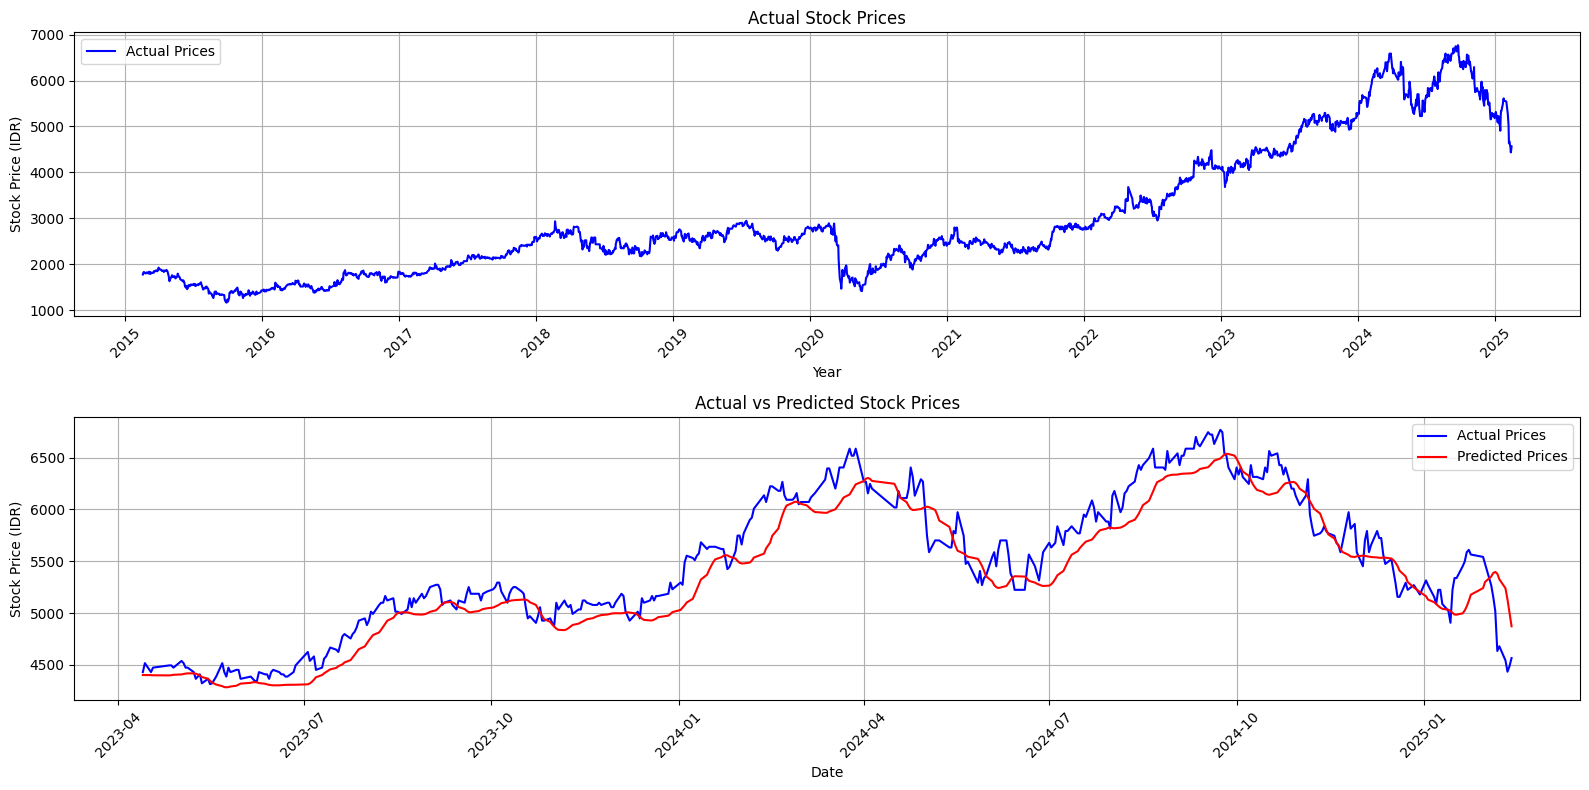

In [ ]:
# import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(16, 8))

# Grafik 1: Harga Aktual dari seluruh dataset
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], color='blue', label='Actual Prices')  # Gunakan seluruh data
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tampilkan hanya tahun
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tahun saja
plt.title('Actual Stock Prices')
plt.xlabel('Year')
plt.ylabel('Stock Price (IDR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Grafik 2: Prediksi Harga vs Aktual (Testing Data)
plt.subplot(2, 1, 2)
plt.plot(df.index[-len(y_test_denormalized):], y_test_denormalized, color='blue', label='Actual Prices')
plt.plot(df.index[-len(y_test_denormalized):], predictions_denormalized, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price (IDR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Format sumbu waktu pada grafik kedua
# plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))

plt.tight_layout()
plt.show()


In [ ]:
# Ambil data terbaru dari test_data
last_60_days = test_data[-60:]  # Ambil 60 hari terakhir sebagai input
last_60_days = np.reshape(last_60_days, (1, last_60_days.shape[0], last_60_days.shape[1]))

# Prediksi harga hari berikutnya
predicted_next_day = model_lstm.predict(last_60_days)

# Denormalisasi hasil prediksi
zero_fill_next_day = np.zeros((1, scaled_data.shape[1]))  # Buat array kosong sesuai jumlah fitur
zero_fill_next_day[:, 3] = predicted_next_day.flatten()  # Masukkan prediksi ke indeks ke-3 ('Close')

# Denormalisasi prediksi harga hari berikutnya
predicted_next_day_price = scaler.inverse_transform(zero_fill_next_day)[:, 3]

# Output hasil prediksi
accuracy = r2 * 100 # Melakukan konversi ke persen
stock_name = df
print(f"Prediksi harga saham di hari berikutnya adalah Rp{predicted_next_day_price[0]:,.2f}, dengan tingkat akurasi sebesar {accuracy:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediksi harga saham di hari berikutnya adalah Rp4,744.93, dengan tingkat akurasi sebesar 87.78%


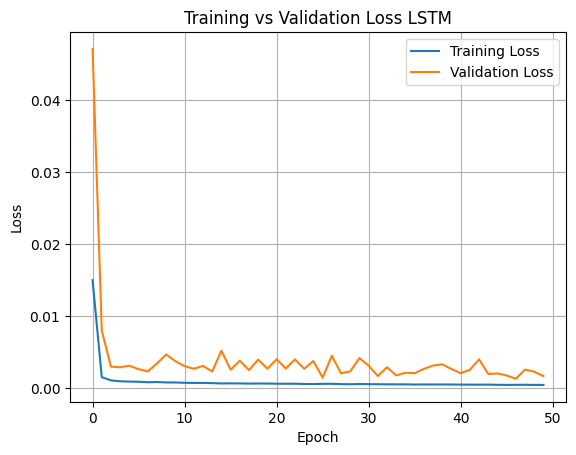

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Menyimpan model LSTM ke file .h5
model_lstm.save('model_lstm.h5')

import pickle

# Simpan scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

from google.colab import files

files.download('model_lstm.h5')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>